In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [4]:
df=pd.read_csv(r"C:\Users\Saidabrorkhon\Downloads\Telegram Desktop\cleaned_data-2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   profession                    513 non-null    int64
 1   social_media_sleep            513 non-null    int64
 2   mood_disorder                 513 non-null    int64
 3   content_type_social_media     513 non-null    int64
 4   think_time_instagram          513 non-null    int64
 5   think_time_whatsapp           513 non-null    int64
 6   think_time_twitter            513 non-null    int64
 7   think_time_facebook           513 non-null    int64
 8   think_time_youtube            513 non-null    int64
 9   think_time_linkedin           513 non-null    int64
 10  actual_time_instagram         513 non-null    int64
 11  actual_time_whatsapp          513 non-null    int64
 12  actual_time_twitter           513 non-null    int64
 13  actual_time_facebook          513 n

In [5]:
df.head()

,profession,social_media_sleep,mood_disorder,content_type_social_media,think_time_instagram,think_time_whatsapp,think_time_twitter,think_time_facebook,think_time_youtube,think_time_linkedin,...,sleep_quality_general,refreshed_after_social_media,anxious_stressed,compare_with_others,headaches_eyestrain,trouble_sleeping_month,sleep_quality_month,social_media_before_bed,nervous_anxious,smartphone_discomfort
0,0,3,4,10,1,2,4,4,2,2,...,4,0,0,3,1,1,3,1,1,3
1,0,4,3,10,2,1,4,2,2,2,...,4,0,0,3,1,1,3,1,1,3
2,0,3,3,16,0,0,4,4,0,0,...,4,0,0,3,1,1,3,1,1,3
3,0,1,2,27,1,2,4,4,2,2,...,4,0,0,3,1,1,3,1,1,3
4,0,3,3,12,2,4,4,4,1,1,...,4,0,0,3,1,1,3,1,1,3


In [6]:
df['profession'].nunique() # I was going to drop the profession but it had values so I did not

13

In [7]:
df.describe()

,profession,social_media_sleep,mood_disorder,content_type_social_media,think_time_instagram,think_time_whatsapp,think_time_twitter,think_time_facebook,think_time_youtube,think_time_linkedin,...,sleep_quality_general,refreshed_after_social_media,anxious_stressed,compare_with_others,headaches_eyestrain,trouble_sleeping_month,sleep_quality_month,social_media_before_bed,nervous_anxious,smartphone_discomfort
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,...,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,0.625731,3.157895,3.060429,20.832359,1.976608,2.226121,3.504873,3.688109,1.719298,2.980507,...,3.321637,0.368421,0.434698,2.756335,0.682261,2.479532,3.265107,0.785575,2.545809,2.861598
std,2.031077,1.287114,1.351451,13.171168,1.416780,1.188955,0.980511,0.785734,1.222813,1.145478,...,1.145584,0.482847,0.496201,1.302448,0.466052,1.318465,1.109217,0.410823,1.342786,1.323742
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,10.000000,1.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000
50%,0.000000,3.000000,3.000000,16.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.000000,...,3.000000,0.000000,0.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000
75%,0.000000,4.000000,4.000000,30.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,1.000000,1.000000,4.000000,1.000000,4.000000,4.000000,1.000000,4.000000,4.000000
max,12.000000,5.000000,5.000000,58.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,1.000000,1.000000,5.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000


since this data set purely numerical and with no missing values we can proceed to scaling but before that we need to check skewness in order to choose which scaling method fits the most. 

In [7]:
skew_values = df.skew(numeric_only=True)
print(skew_values)

profession                      3.177112
social_media_sleep             -0.214075
mood_disorder                  -0.167327
content_type_social_media       0.731293
think_time_instagram            0.086962
think_time_whatsapp            -0.094391
think_time_twitter             -2.160257
think_time_facebook            -2.880645
think_time_youtube              0.291733
think_time_linkedin            -0.791493
actual_time_instagram           0.151446
actual_time_whatsapp           -0.121834
actual_time_twitter            -2.089594
actual_time_facebook           -2.768408
actual_time_youtube             0.272761
actual_time_linkedin           -0.976531
focus_quality                  -0.192773
binge_watch_reels              -0.103659
sad_content_feed               -0.406388
social_media_purpose           -0.591420
social_relationship_impact     -0.059143
time_loss_social_media         -3.185368
sleep_quality_general          -0.339644
refreshed_after_social_media    0.547146
anxious_stressed

C:\Users\musli\AppData\Local\Temp\ipykernel_10320\2597285507.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_df.index, y='skewness', data=skew_df, palette='coolwarm')


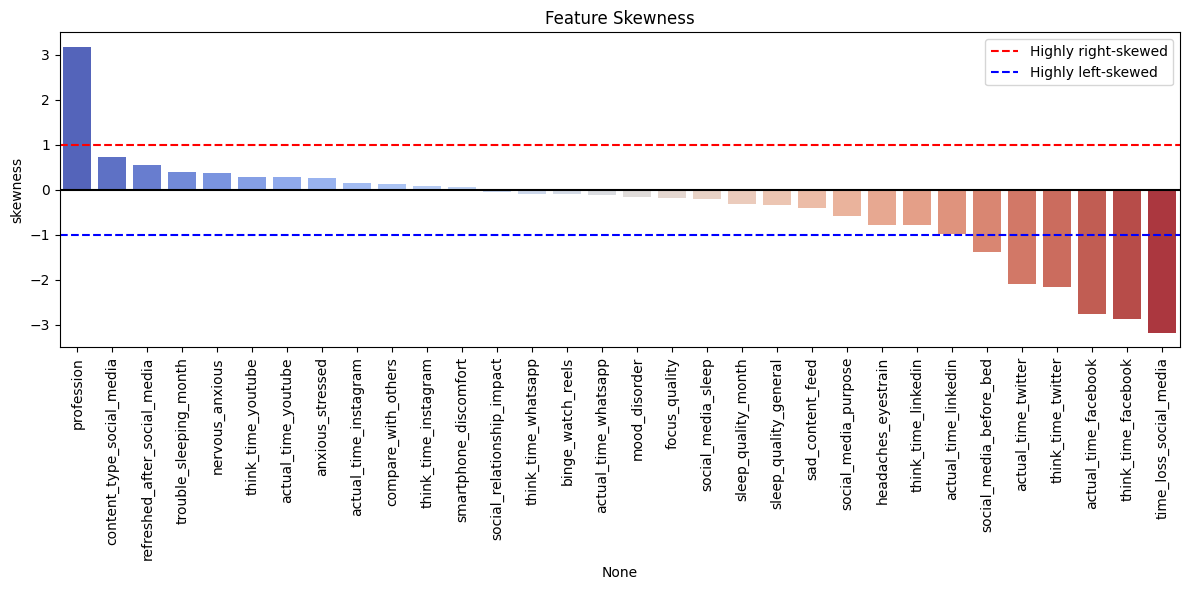

In [8]:
skew_series = df.skew(numeric_only=True) #schecking data skewness


skew_df = skew_series.to_frame(name='skewness').sort_values(by='skewness', ascending=False)  #converting it to dataframe and sort in a ascending form

      #  Plot 
plt.figure(figsize=(12, 6))  
sns.barplot(x=skew_df.index, y='skewness', data=skew_df, palette='coolwarm')
plt.axhline(1, color='red', linestyle='--', label='Highly right-skewed')
plt.axhline(-1, color='blue', linestyle='--', label='Highly left-skewed')
plt.axhline(0, color='black', linestyle='-')
plt.xticks(rotation=90)
plt.title('Feature Skewness')
plt.legend()
plt.tight_layout()
plt.show()


as we can see data is highly skewed. there are two options: Power Transformer or Robust scaling. best fit is power transformer. 

In [9]:
from sklearn.preprocessing import PowerTransformer


In [ ]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)


In [20]:
preprocessing_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', PowerTransformer(method='yeo-johnson'))
])

# Feature Engineering

Creating new useful features

In [ ]:
# Total time spent (actual + think)
# High usage could be linked to stress, anxiety, or poor sleep — relevant to mood disorders (target value)
df['total_actual_time'] = df[[col for col in df.columns if 'actual_time' in col]].sum(axis=1)


df['total_think_time'] = df[[col for col in df.columns if 'think_time' in col]].sum(axis=1)
df['usage_gap'] = df['total_actual_time'] - df['total_think_time']

In [ ]:
# Average time per platform
# There are 6 platforms (instagram, whatsapp, twitter, facebook, youtube, linkedIn), so divide by 6 to get the average actaul time spent and average think time on social media
df['avg_actual_time'] = df['total_actual_time'] / 6
df['avg_think_time'] = df['total_think_time'] / 6

In [ ]:
# Focus vs time spent

#How much focus does a person have per minute of social media use?

# If someone has high focus and low actual social media use, this ratio will be high, possibly indicating healthy behavior.

# 
df['focus_per_time'] = df['focus_quality'] / (df['total_actual_time'] + 1)

# total_actual_time could be zero for some users (they didnt use any social media).

# Dividing by zero would cause an error (ZeroDivisionError).

# Adding +1 ensures pipeline will not crash

In [12]:
# Profession is just an ID number, not a real category, so dropping it
df.drop(columns=['profession'], inplace=True)

C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_8704\3877944693.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_df.index, y='skewness', data=skew_df, palette='coolwarm')


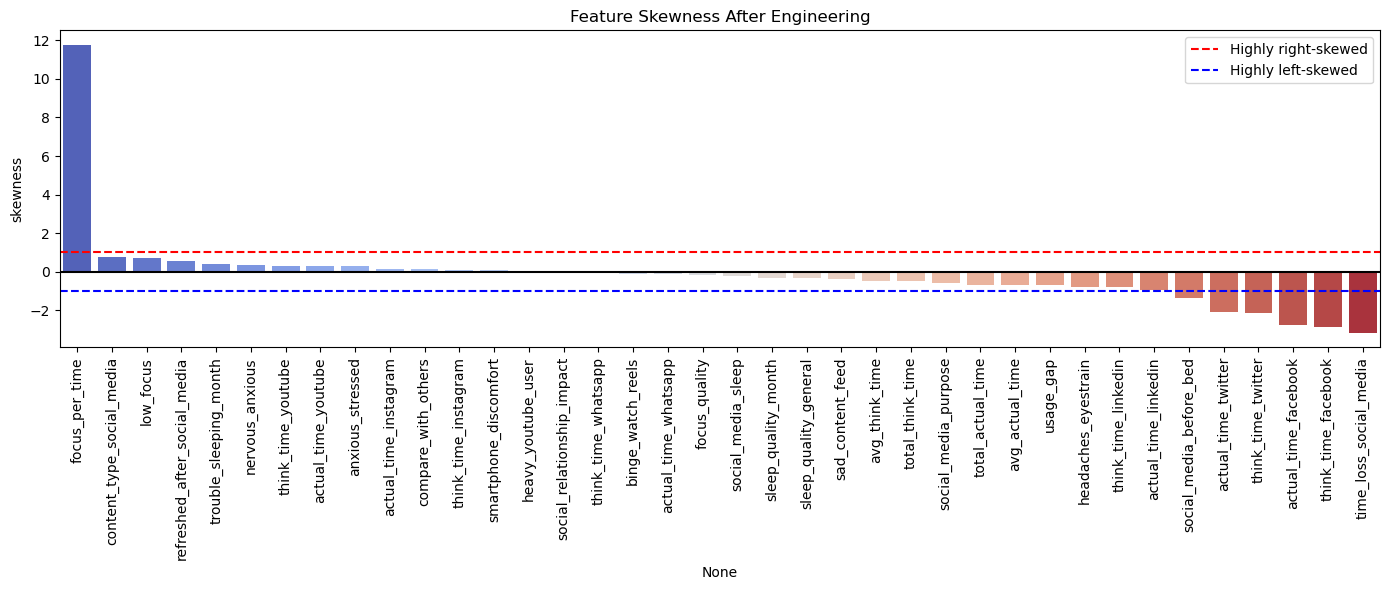

In [13]:
# Visualize skewness of numeric features (excluding target)
from matplotlib import pyplot as plt
import seaborn as sns

skew_df = df.drop(columns=['mood_disorder']).skew(numeric_only=True).to_frame(name='skewness')
skew_df = skew_df.sort_values(by='skewness', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=skew_df.index, y='skewness', data=skew_df, palette='coolwarm')
plt.axhline(1, color='red', linestyle='--', label='Highly right-skewed')
plt.axhline(-1, color='blue', linestyle='--', label='Highly left-skewed')
plt.axhline(0, color='black', linestyle='-')
plt.xticks(rotation=90)
plt.title('Feature Skewness After Engineering')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_8704\1201684368.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='MI Score', data=mi_df, palette='viridis')


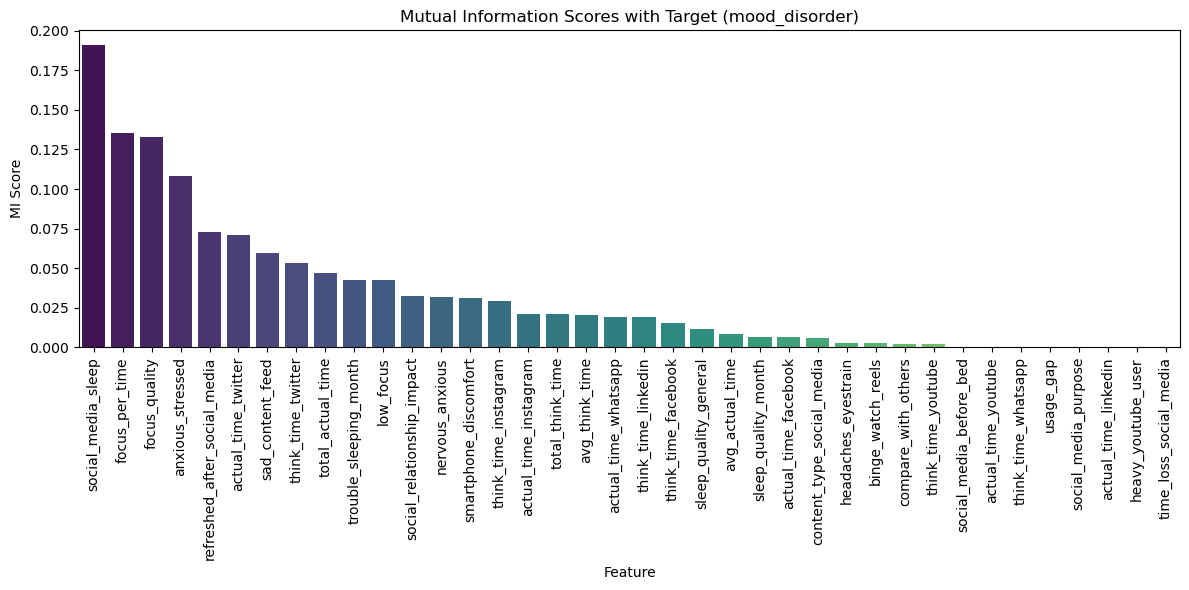

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['mood_disorder'])
y = df['mood_disorder']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='MI Score', data=mi_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Mutual Information Scores with Target (mood_disorder)')
plt.tight_layout()
plt.show()

In [ ]:
# Features and target
X = df.drop(columns=['mood_disorder'])
y = df['mood_disorder']

# Mutual informatipn
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Creating DataFrame
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi_scores
})

# Sorting values
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False).reset_index(drop=True)

mi_df

,Feature,Mutual_Information
0,focus_quality,0.204010
1,social_media_sleep,0.166362
2,focus_per_time,0.117422
3,anxious_stressed,0.077988
4,nervous_anxious,0.058905
5,actual_time_youtube,0.057983
6,refreshed_after_social_media,0.053955
7,compare_with_others,0.053240
8,sad_content_feed,0.048630
9,time_loss_social_media,0.038688


In [ ]:
# After mutual info, these columns are to drop as they have no value at all.

drop_cols = [
    'total_actual_time',
    'think_time_instagram',
    'heavy_youtube_user',
    'actual_time_twitter',
    'social_media_before_bed',
    'think_time_youtube',
    'content_type_social_media',
    'social_relationship_impact',
    'think_time_linkedin',
    'actual_time_linkedin',
    'headaches_eyestrain'
]

df.drop(columns=drop_cols, inplace=True)